In [1]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

Parameters:

learning_rate = float, optional (default = 0.01)
Model learning rate

epochs = int, optional (default = 1000)
Number of training epochs



Methods:

fit(x,y,seed)   where x = training datapoints (Nx2),
                      y = classes of the datapoints used for training(x) (Nx1),
                      seed = seed used for weight initialisation
        
                Returns: None. Fits the model 

                
predict(x,threshold)     where x = test datapoints (Nx2)
                               threshold = float, optional (default = 0.5). Used to caclulate the threshold probabilites for                                                                                 class prediction.

                          Returns: class predictions (Nx1)
    


predict_prob(x)   where x = test datapoints (Nx2)

                  Returns: probabilities that the point belongs to the class predicted in predict() (Nx1)
    
                
plot_bounds(X,y)  where X = datapoints (Nx2)
                        y = classes (Nx1)

                  Returns: None. Plots and visualises the decision bounds


error(y_true,y_pred)   where y_true = true classes corresponding to test set (Nx1)
                             y_pred = predicted classes corresponding to test set (Nx1)

                       Returns:
                             score - percentage accuracy of the model

In [2]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs

    
    # Add bias vector to the input matrix
    def add_bias(self, X):
        bias = np.ones((X.shape[0], 1))
        return np.concatenate((bias, X), axis=1)
    
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    
    # Logistic regression loss function
    def binary_loss(self, output, y):
        # loss = 1/n ( -y^T * log(output) - (1-y)^T * log(1-output))
        return np.mean(-y.T * np.log(output) - (1 - y).T * np.log(1 - output))
    
    
    def forward(self,x):
        z1 = np.dot(x, self.weights)
        return self.sigmoid(z1)
    
    
    def update(self,x,output,y):
        # Gradients are updated by calculating the partial derviative of the loss wrt the weights
        # dloss/dweights = 1/n * X^T(output-y) where output = sigmoid (X^T * weights)
        gradient = np.dot(x.T, (output - y)) / y.size
        self.weights -= self.learning_rate * gradient
        
        
    def fit(self, x, y, seed=None):
        
        x = self.add_bias(x)
        
        # Weight initialisation 
        np.random.seed(seed)
        self.weights = np.random.rand(x.shape[1])
        
        # Iteratively train the model
        for e in range(self.epochs):
            # Calculate output by transforming input though sigmoid(X^T*weights)
            output = self.forward(x)
            # Update weights using gradient information
            self.update(x,output,y)
            
            if(e % 1000 == 0):
                print(f'loss: {self.binary_loss(output, y)} \t')
    
    
    # Predicts the probability of datapoint belonging to class
    def predict_prob(self, x):
        x = self.add_bias(x)
        return self.sigmoid(np.dot(x, self.weights))
    
    
    # Predicts if datapoint belongs to class 1 or not
    def predict(self, x, threshold=0.5):
        return (self.predict_prob(x) >= threshold).astype(int)


    # Plots decision bounds with data ontop
    def plot_bounds(self,X,y):
        arg = np.max(X)*1.5
        xx, yy = np.mgrid[-arg:arg:.01, -arg:arg:.01]
        grid = np.c_[xx.ravel(), yy.ravel()]

        # To compute the decision boundry, sample the whole grid and plot the countours
        probs = np.reshape(model.predict_prob(grid),xx.shape)

        f, ax = plt.subplots(figsize=(8, 6))
        contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                              vmin=0, vmax=1)
        ax_c = f.colorbar(contour)
        ax_c.set_ticks([0, .25, .5, .75, 1])

        ax.scatter(X[:,0], X[:, 1], c=y, s=50,
                   cmap="RdBu", vmin=-.2, vmax=1.2,
                   edgecolor="white", linewidth=1)
        

        ax.set(aspect="equal",
               xlabel="$X_1$", ylabel="$X_2$")
        
    # Returns percentage accuracy 
    def error(self,y_true,y_pred):
        count = len(np.where(y_pred==y_true)[0])
        return (count/len(y_true))*100

loss: 0.8187438580716108 	
loss: 0.24760698149626595 	
loss: 0.2472342297437872 	
loss: 0.24722531963047611 	
loss: 0.24722507072494893 	
loss: 0.24722506360164914 	
loss: 0.24722506339696573 	
loss: 0.2472250633910803 	
loss: 0.24722506339091102 	
loss: 0.24722506339090614 	


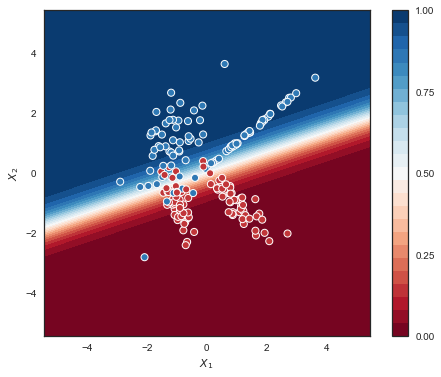

In [3]:
# Generate train data
X_train, y_train = make_classification(200, 2, 2, 0, weights=[.5, .5], random_state=15)

model = LogisticRegression(learning_rate=0.1, epochs=10000)
model.fit(X_train, y_train, seed=1)
model.plot_bounds(X_train,y_train)

Percentage accuracy: 85.0 %


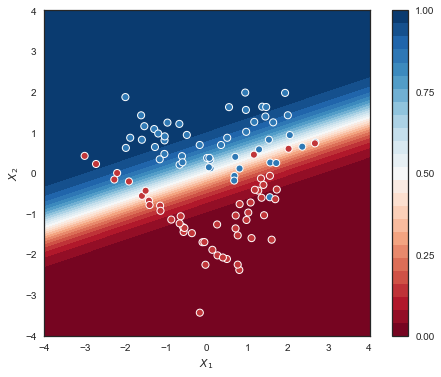

In [7]:
# Generate test data
X_test, y_test = make_classification(100, 2, 2, 0, weights=[.5,.5])
# Calculate predictions
predictions = model.predict(X_test)
# Plot bounds
model.plot_bounds(X_test,y_test)
# Calculate percentage error
print("Percentage accuracy:",model.error(y_test,predictions),"%")